#Libraries

In [1]:
!pip install tensorflowjs

INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 31.0 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully unin

In [2]:
!pip install tensorflow==2.15.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 75.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 61.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 102.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.6 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.0
    Uninstalling wrapt-1.17.0:
      Successfully uninstalled wrapt-1.17.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: tensorboard
    Found existing installatio

In [3]:
!pip install tensorflow_decision_forests==1.8.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 13.7 MB/s eta 0:00:00
  Attempting uninstall: tensorflow_decision_forests
    Found existing installation: tensorflow_decision_forests 1.11.0
    Uninstalling tensorflow_decision_forests-1.11.0:
      Successfully uninstalled tensorflow_decision_forests-1.11.0


In [4]:
# Data
# Load Data
from google.colab import files
from google.colab import drive
import zipfile
import os
# Preview Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Preprocessing Data
import shutil
from PIL import Image
import os
import cv2
# Model
# Tensorflow
import tensorflow as tf
import tensorflowjs as tfjs
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNet
# Accuracy and Loss
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
# Prediction
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.preprocessing import image
from google.colab import files
import numpy as np

#Preparing Dataset

###Load Dataset

In [5]:
drive.mount('/content/drive')
zip_path='/content/drive/MyDrive/KebunQ/grape.zip'

Mounted at /content/drive


In [6]:
! unzip "/content/drive/MyDrive/KebunQ/grape.zip" -d .

Streaming output truncated to the last 5000 lines.
  inflating: ./grape/Esca (Black Measles)/33880a34-ebaa-47df-916a-d65d4662a1c0___FAM_B.Msls 1790.JPG  
  inflating: ./grape/Esca (Black Measles)/33880a34-ebaa-47df-916a-d65d4662a1c0___FAM_B.Msls 1790_flipLR.JPG  
  inflating: ./grape/Esca (Black Measles)/3394d516-c118-4362-b159-da7a97bcde07___FAM_B.Msls 1120.JPG  
  inflating: ./grape/Esca (Black Measles)/3394d516-c118-4362-b159-da7a97bcde07___FAM_B.Msls 1120_flipLR.JPG  
  inflating: ./grape/Esca (Black Measles)/33f8d1cd-0773-4a0c-a82d-ec43072cabef___FAM_B.Msls 0876_flipLR.JPG  
  inflating: ./grape/Esca (Black Measles)/33fa4137-bd24-45af-a9b8-ad63c6173123___FAM_B.Msls 4351.JPG  
  inflating: ./grape/Esca (Black Measles)/33fa4137-bd24-45af-a9b8-ad63c6173123___FAM_B.Msls 4351_flipLR.JPG  
  inflating: ./grape/Esca (Black Measles)/33ff42ab-8ff7-46b6-baa2-7b7b6ae799af___FAM_B.Msls 3965.JPG  
  inflating: ./grape/Esca (Black Measles)/33ff42ab-8ff7-46b6-baa2-7b7b6ae799af___FAM_B.Msls 3965_

In [7]:
grape_data = "/content/grape"
grape_classes = os.listdir(grape_data)

In [8]:
print("Grape Classes:")
for classes in grape_classes:
  if os.path.isdir(os.path.join(grape_data, classes)):
    print(classes)

Grape Classes:
Leaf Blight
Healthy
Esca (Black Measles)
Black Rot


###Preview Image Dataset


Leaf Blight
Total Images: 1721
Resolution of First Image: (256, 256, 3)


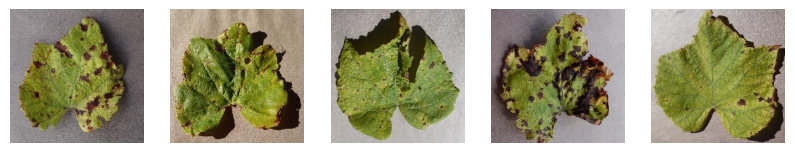


Healthy
Total Images: 1691
Resolution of First Image: (256, 256, 3)


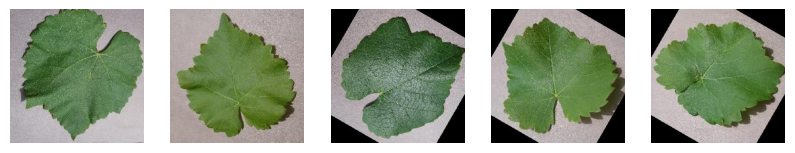


Esca (Black Measles)
Total Images: 1919
Resolution of First Image: (256, 256, 3)


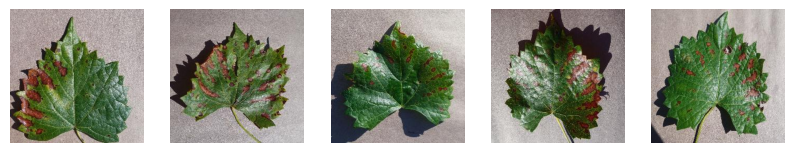


Black Rot
Total Images: 1887
Resolution of First Image: (256, 256, 3)


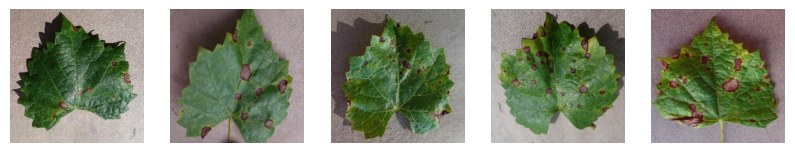

In [9]:
for item in grape_classes:
  print("")
  print(item)
  class_dir = os.path.join(grape_data, item)
  class_images = os.listdir(class_dir)

  # Total images in each classes
  num_images = len(class_images)
  print("Total Images:", num_images)

  # Resolution/size of each first image in class
  img_path = os.path.join(class_dir, class_images[0])
  img = mpimg.imread(img_path)
  image_shape = img.shape
  print("Resolution of First Image:", image_shape)

  # Showing some images
  plt.figure(figsize=(10, 5))
  for i, img_path in enumerate(class_images[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(class_dir, img_path))
    plt.axis('off')
    plt.imshow(img)
  plt.show()

#Preprocessing Dataset

In [10]:
resized_dir = "/content/drive/MyDrive/KebunQ/resized"
os.makedirs(resized_dir, exist_ok=True)

def normalize_image(images):
  normalized_image = images.astype(np.float32) / 255.0
  return normalized_image

for item in grape_classes:
  class_dir = os.path.join(grape_data, item)
  class_image = os.listdir(class_dir)

  for i, img_path in enumerate(class_image):
    img = Image.open(os.path.join(class_dir, img_path))
    resized_img = img.resize((224, 224))
    normalized_img = normalize_image(np.array(resized_img))

    save_path = os.path.join(resized_dir, item, img_path)
    os.makedirs(os.path.dirname(save_path), exist_ok=True)
    Image.fromarray((normalized_img * 255).astype(np.uint8)).save(save_path)


In [11]:
resized_dir = "/content/drive/MyDrive/KebunQ/resized"
grape_classes = os.listdir(resized_dir)

for grape_class in grape_classes:
  class_dir = os.path.join(resized_dir, grape_class)
  if os.path.isdir(class_dir):
    file_list = os.listdir(class_dir)
    for i, file_name in enumerate(file_list):
      file_path = os.path.join(class_dir, file_name)
      new_file_name = f"{grape_class}_{i+1}.jpg"
      new_file_path = os.path.join(class_dir, new_file_name)
      os.rename(file_path, new_file_path)

In [12]:
datafinal_dir = "/content/drive/MyDrive/KebunQ/datafinal"

num_images_per_class = min(len(os.listdir(resized_dir+"/Esca (Black Measles)")),
                           len(os.listdir(resized_dir+"/Healthy")),
                           len(os.listdir(resized_dir+"/Leaf Blight")),
                           len(os.listdir(resized_dir+"/Black Rot")))

os.makedirs(datafinal_dir+"/Esca (Black Measles)", exist_ok=True)
os.makedirs(datafinal_dir+"/Healthy", exist_ok=True)
os.makedirs(datafinal_dir+"/Leaf Blight", exist_ok=True)
os.makedirs(datafinal_dir+"/Black Rot", exist_ok=True)

selected_images = os.listdir(resized_dir+"/Esca (Black Measles)")[:num_images_per_class]
for image in selected_images:
    shutil.copy(os.path.join(resized_dir+"/Esca (Black Measles)", image), datafinal_dir+"/Esca (Black Measles)")

selected_images = os.listdir(resized_dir+"/Healthy")[:num_images_per_class]
for image in selected_images:
    shutil.copy(os.path.join(resized_dir+"/Healthy", image), datafinal_dir+"/Healthy")

selected_images = os.listdir(resized_dir+"/Leaf Blight")[:num_images_per_class]
for image in selected_images:
    shutil.copy(os.path.join(resized_dir+"/Leaf Blight", image), datafinal_dir+"/Leaf Blight")

selected_images = os.listdir(resized_dir+"/Black Rot")[:num_images_per_class]
for image in selected_images:
    shutil.copy(os.path.join(resized_dir+"/Black Rot", image), datafinal_dir+"/Black Rot")



Leaf Blight
Total Images: 1691
Resolution of Arfter Resized: (224, 224, 3)


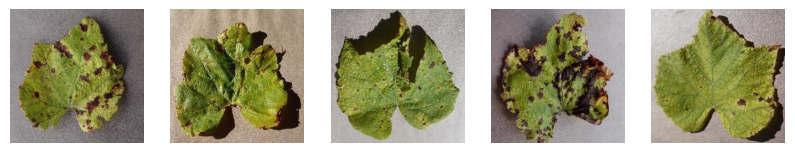


Healthy
Total Images: 1691
Resolution of Arfter Resized: (224, 224, 3)


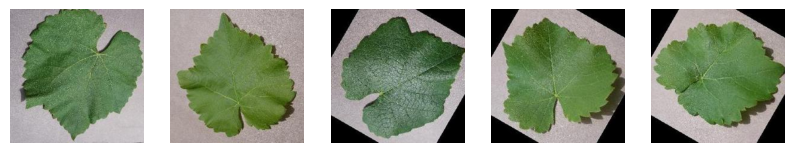


Esca (Black Measles)
Total Images: 1691
Resolution of Arfter Resized: (224, 224, 3)


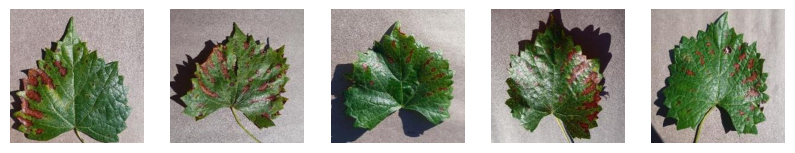


Black Rot
Total Images: 1691
Resolution of Arfter Resized: (224, 224, 3)


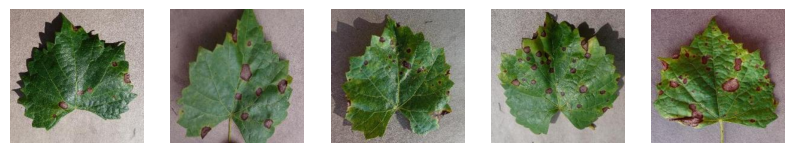

In [13]:
datafinal_dir = "/content/drive/MyDrive/KebunQ/datafinal"

for item in grape_classes:
  print("")
  print(item)
  class_dir = os.path.join(datafinal_dir, item)
  class_images = os.listdir(class_dir)

  # Total images in each classes
  num_images = len(class_images)
  print("Total Images:", num_images)

  # Resolution/size of each first image in class
  img_path = os.path.join(class_dir, class_images[0])
  img = mpimg.imread(img_path)
  image_shape = img.shape
  print("Resolution of Arfter Resized:", image_shape)

  # Showing some images
  plt.figure(figsize=(10, 5))
  for i, img_path in enumerate(class_images[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(class_dir, img_path))
    plt.axis('off')
    plt.imshow(img)
  plt.show()

#Building Detection Model

###Split Data into Train, Validation, and Test

In [14]:
import random

data_dir = "/content/drive/MyDrive/KebunQ/datafinal"
train_dir = "/content/drive/MyDrive/KebunQ/train"
val_dir = "/content/drive/MyDrive/KebunQ/validation"
test_dir = "/content/drive/MyDrive/KebunQ/test"

os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

classes = os.listdir(data_dir)

train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

for class_name in classes:
  class_dir = os.path.join(data_dir, class_name)
  images = os.listdir(class_dir)
  num_images = len(images)

  random.shuffle(images)

  train_split = int(train_ratio * num_images)
  val_split = int((train_ratio + val_ratio) * num_images)

  train_images = images[:train_split]
  val_images = images[train_split:val_split]
  test_images = images[val_split:]

  for image in train_images:
    src_path = os.path.join(class_dir, image)
    dst_path = os.path.join(train_dir, class_name, image)
    os.makedirs(os.path.dirname(dst_path), exist_ok=True)
    shutil.copy(src_path, dst_path)

  for image in val_images:
    src_path = os.path.join(class_dir, image)
    dst_path = os.path.join(val_dir, class_name, image)
    os.makedirs(os.path.dirname(dst_path), exist_ok=True)
    shutil.copy(src_path, dst_path)

  for image in test_images:
    src_path = os.path.join(class_dir, image)
    dst_path = os.path.join(test_dir, class_name, image)
    os.makedirs(os.path.dirname(dst_path), exist_ok=True)
    shutil.copy(src_path, dst_path)

In [15]:
train_count = 0
val_count = 0
test_count = 0

for class_name in classes:
  train_class_dir = os.path.join(train_dir, class_name)
  val_class_dir = os.path.join(val_dir, class_name)
  test_class_dir = os.path.join(test_dir, class_name)

  train_count += len(os.listdir(train_class_dir))
  val_count += len(os.listdir(val_class_dir))
  test_count += len(os.listdir(test_class_dir))

print("Train data count:", train_count)
print("Validation data count:", val_count)
print("Test data count:", test_count)

Train data count: 5408
Validation data count: 676
Test data count: 680


###Training and Validation Generator

In [16]:
data_dir = "/content/drive/MyDrive/KebunQ/datafinal"
train_dir = "/content/drive/MyDrive/KebunQ/train"
val_dir = "/content/drive/MyDrive/KebunQ/validation"
test_dir = "/content/drive/MyDrive/KebunQ/test"

img_dim = 224

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_dim, img_dim),
    batch_size=100,
    class_mode='categorical'
)

val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(img_dim, img_dim),
    batch_size=100,
    class_mode='categorical',
)


Found 5408 images belonging to 4 classes.
Found 676 images belonging to 4 classes.


In [17]:
train_generator.class_indices

{'Black Rot': 0, 'Esca (Black Measles)': 1, 'Healthy': 2, 'Leaf Blight': 3}

In [18]:
labels = []
for label in train_generator.class_indices:
  labels.append(label)
num_labels = len(labels)

print("Labels: {}".format(labels))
print("Num Labels: {}".format(num_labels))

Labels: ['Black Rot', 'Esca (Black Measles)', 'Healthy', 'Leaf Blight']
Num Labels: 4


###Build Model 1

####Model Architecture 1

In [19]:
# Load MobileNet Model
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze Base Model Layer
base_model.trainable = False

# Add custom classification layers on top
model1 = tf.keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_labels, activation='softmax')
])

model1.summary()

17225924/17225924 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functi  (None, 7, 7, 1024)        3228864   
 onal)                                                           
                                                                 
 global_average_pooling2d (  (None, 1024)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 64)                65600     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 4)                 260       
                                                         

####Training and Evaluation Model 1

In [20]:
model1.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Defining Callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=4, restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint('best_model1.h5', save_best_only=True),
]

history1 = model1.fit(
    train_generator,
    epochs=50,
    steps_per_epoch=len(train_generator),
    validation_data=val_generator,
    validation_steps=len(val_generator),
    callbacks=callbacks
)

Epoch 1/50
55/55 [==============================] - 111s 2s/step - loss: 0.5925 - accuracy: 0.7798 - val_loss: 0.1330 - val_accuracy: 0.9512


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/50
55/55 [==============================] - 107s 2s/step - loss: 0.1720 - accuracy: 0.9455 - val_loss: 0.1104 - val_accuracy: 0.9512
Epoch 3/50
55/55 [==============================] - 102s 2s/step - loss: 0.1378 - accuracy: 0.9540 - val_loss: 0.0732 - val_accuracy: 0.9734
Epoch 4/50
55/55 [==============================] - 103s 2s/step - loss: 0.1012 - accuracy: 0.9675 - val_loss: 0.0700 - val_accuracy: 0.9734
Epoch 5/50
55/55 [==============================] - 100s 2s/step - loss: 0.0875 - accuracy: 0.9730 - val_loss: 0.0787 - val_accuracy: 0.9630
Epoch 6/50
55/55 [==============================] - 99s 2s/step - loss: 0.0930 - accuracy: 0.9676 - val_loss: 0.0733 - val_accuracy: 0.9704
Epoch 7/50
55/55 [==============================] - 102s 2s/step - loss: 0.0750 - accuracy: 0.9730 - val_loss: 0.0671 - val_accuracy: 0.9704
Epoch 8/50
55/55 [==============================] - 101s 2s/step - loss: 0.0791 - accuracy: 0.9745 - val_loss: 0.0539 - val_accuracy: 0.9778
Epoch 9/50
55/

In [21]:
test_loss, test_accuracy = model1.evaluate(val_generator, steps=len(val_generator))
print("Test Loss:", test_loss)
print("Test Accuracy", test_accuracy)

7/7 [==============================] - 10s 1s/step - loss: 0.0523 - accuracy: 0.9837
Test Loss: 0.052273936569690704
Test Accuracy 0.9837278127670288


In [22]:
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_dim, img_dim),
    batch_size=100,
    class_mode='categorical',
    shuffle=False
)

loss, accuracy = model1.evaluate(test_generator, steps=len(test_generator))
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Found 680 images belonging to 4 classes.
7/7 [==============================] - 5s 711ms/step - loss: 0.0502 - accuracy: 0.9868
Test Loss: 0.05016927048563957
Test Accuracy: 0.9867647290229797


####Visualization of Accuracy and Loss & Confusion Matrix Model 1

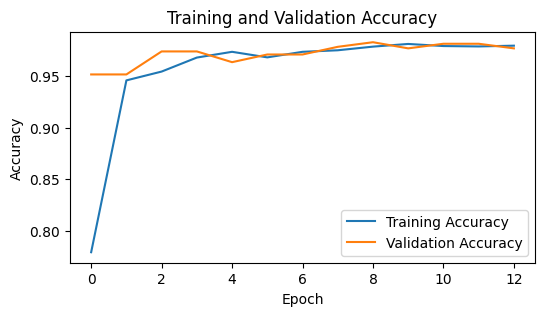

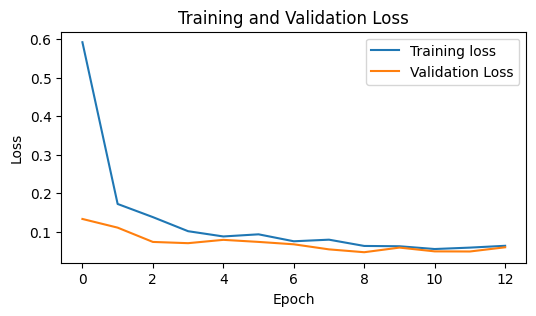

In [23]:
# Accuracy Plot
plt.figure(figsize=(6, 3))
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss Plot
plt.figure(figsize=(6, 3))
plt.plot(history1.history['loss'], label='Training loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

7/7 [==============================] - 4s 461ms/step


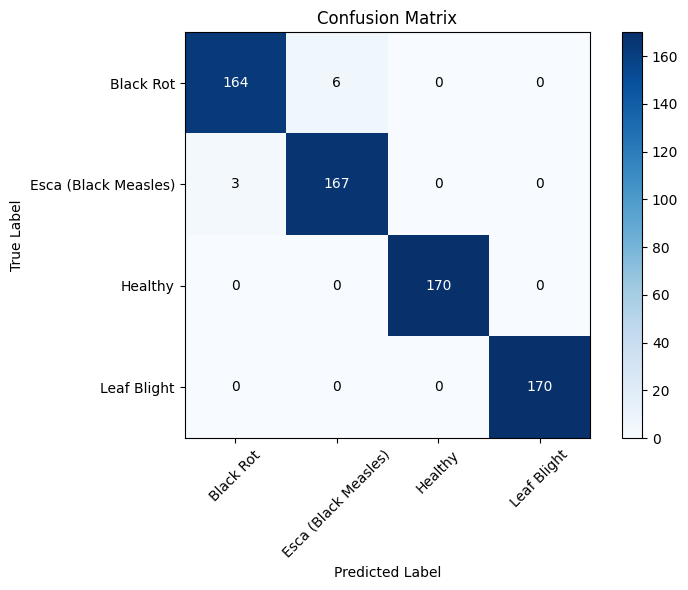

In [24]:
# Model Predict
y_pred = model1.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)

# True Label
y_true = test_generator.classes

# Class Names
class_names = list(test_generator.class_indices.keys())

# Count Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Create confusion matrix plot
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Display a label in each cell of the confusion matrix
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

In [25]:
# define classification report method
def class_report(y_test, y_pred):
  print("Labels: ",train_generator.class_indices)
  print()
  print(classification_report(y_test, y_pred))

# show classification report
class_report(y_true, y_pred)

Labels:  {'Black Rot': 0, 'Esca (Black Measles)': 1, 'Healthy': 2, 'Leaf Blight': 3}

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       170
           1       0.97      0.98      0.97       170
           2       1.00      1.00      1.00       170
           3       1.00      1.00      1.00       170

    accuracy                           0.99       680
   macro avg       0.99      0.99      0.99       680
weighted avg       0.99      0.99      0.99       680



####Testing Prediction Model 1

Saving ddd.jpg to ddd.jpg


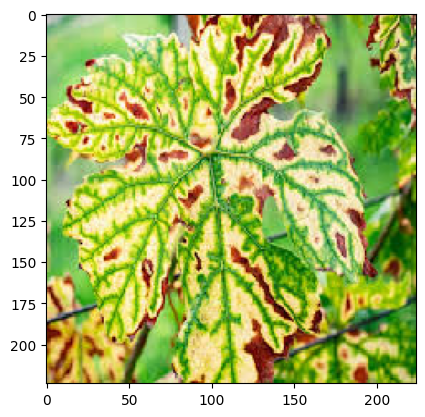

1/1 [==============================] - 0s 24ms/step

Predict:
Esca (Black Measles)

Probability:
Black Rot : 0.01%
Esca (Black Measles) : 96.38%
Healthy : 3.38%
Leaf Blight : 0.23%


In [33]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from google.colab import files

# Definisikan label kelas
labels = ['Black Rot', 'Esca (Black Measles)', 'Healthy', 'Leaf Blight']

# Upload gambar
uploaded = files.upload()

# Proses setiap gambar yang di-upload
for path in uploaded.keys():
    # Load dan preprocess gambar
    img = image.load_img(path, target_size=(224, 224))
    imgplot = plt.imshow(img)
    plt.show()

    # Convert image ke array
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x /= 255  # Normalisasi

    # Prediksi kelas gambar
    classes = model1.predict(x, batch_size=32)
    predicted_class_indices = np.argmax(classes)

    # Menampilkan hasil prediksi
    print("\nPredict:")
    print(labels[predicted_class_indices])

    # Menampilkan probabilitas setiap kelas
    print("\nProbability:")
    for idx, val in enumerate(labels):
        print(f"{val} : {classes[0][idx] * 100:.2f}%")

####Saving Model 1

In [34]:
model1.save("grape_model_1.h5")
tf.keras.models.save_model(model1, 'grape_model_1.hdf5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
<ipython-input-34-33fed9743555>:2: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(model1, 'grape_model_1.hdf5')


In [ ]:
import subprocess

# Path model .h5
h5_model_path = 'grape_model_1.h5'

# Path output untuk model TensorFlow.js
tfjs_output_path = 'tfjs_model1/'

# Perintah konversi menggunakan tensorflowjs_converter
command = [
    'tensorflowjs_converter',
    '--input_format=keras',
    h5_model_path,
    tfjs_output_path
]

# Eksekusi konversi
try:
    subprocess.run(command, check=True)
    print(f"Model berhasil dikonversi ke TensorFlow.js di: {tfjs_output_path}")
except subprocess.CalledProcessError as e:
    print(f"Error saat mengonversi model: {e}")


Model berhasil dikonversi ke TensorFlow.js di: tfjs_model1/


In [ ]:
import shutil

# Path folder hasil konversi
tfjs_output_path = 'tfjs_model1'

# Nama file ZIP output
zip_file_name = 'tfjs_model1.zip'

# Membuat file ZIP dari folder
shutil.make_archive(zip_file_name.replace('.zip', ''), 'zip', tfjs_output_path)

print(f"Folder '{tfjs_output_path}' berhasil dikompresi menjadi '{zip_file_name}'")


Folder 'tfjs_model1' berhasil dikompresi menjadi 'tfjs_model1.zip'


###Build Model 2

####Model Architecture 2

In [35]:
# Model Definition
img_shape = (224, 224, 3)

model2 = tf.keras.models.Sequential([
    layers.Conv2D(64,(3,3),activation='relu', input_shape=img_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(256,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(512,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(512,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dense(256,activation='relu'),
    layers.Dense(num_labels, activation='softmax')
])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)      

####Training and Evaluation Model 2

In [ ]:
model2.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=4, restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint('best_model2.keras', save_best_only=True)
]

history2 = model2.fit(
    train_generator,
    epochs=50,
    steps_per_epoch=len(train_generator),
    validation_data=val_generator,
    validation_steps=len(val_generator),
    callbacks=callbacks
)

Epoch 1/50
55/55 [==============================] - 123s 2s/step - loss: 1.3757 - accuracy: 0.2811 - val_loss: 1.3104 - val_accuracy: 0.4231
Epoch 2/50
55/55 [==============================] - 112s 2s/step - loss: 1.0838 - accuracy: 0.4455 - val_loss: 0.9306 - val_accuracy: 0.5148
Epoch 3/50
55/55 [==============================] - 110s 2s/step - loss: 0.7267 - accuracy: 0.6779 - val_loss: 0.4850 - val_accuracy: 0.7352
Epoch 4/50
55/55 [==============================] - 112s 2s/step - loss: 0.4343 - accuracy: 0.8138 - val_loss: 0.4481 - val_accuracy: 0.7840
Epoch 5/50
55/55 [==============================] - 119s 2s/step - loss: 0.3540 - accuracy: 0.8567 - val_loss: 0.3242 - val_accuracy: 0.8846
Epoch 6/50
55/55 [==============================] - 112s 2s/step - loss: 0.3149 - accuracy: 0.8793 - val_loss: 0.2328 - val_accuracy: 0.9083
Epoch 7/50
55/55 [==============================] - 110s 2s/step - loss: 0.2668 - accuracy: 0.9003 - val_loss: 0.1975 - val_accuracy: 0.9275
Epoch 8/50
55

In [ ]:
# Evaluate the Model
test_loss, test_accuracy = model2.evaluate(val_generator, steps=len(val_generator))
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

7/7 [==============================] - 12s 2s/step - loss: 0.0744 - accuracy: 0.9734
Test Loss: 0.07435423135757446
Test Accuracy: 0.973372757434845


In [ ]:
# Image Data Generator
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Test Generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (224, 224),
    batch_size = 100,
    class_mode = 'categorical',
    shuffle = False
)

# Evaluate the Model on Test Set
loss, accuracy = model2.evaluate(test_generator, steps=len(test_generator))
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Found 680 images belonging to 4 classes.
7/7 [==============================] - 6s 948ms/step - loss: 0.0542 - accuracy: 0.9779
Test Loss: 0.05417145416140556
Test Accuracy: 0.9779411554336548


####Visualization of Accuracy and Loss & Confusion Matrix Model 2

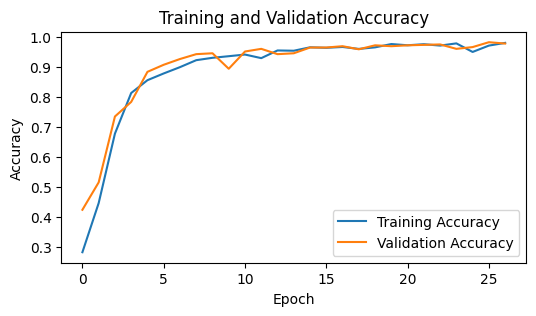

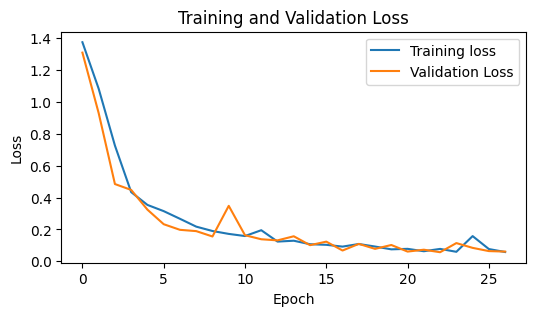

In [ ]:
# Accuracy Plot
plt.figure(figsize=(6, 3))
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss Plot
plt.figure(figsize=(6, 3))
plt.plot(history2.history['loss'], label='Training loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

7/7 [==============================] - 4s 504ms/step


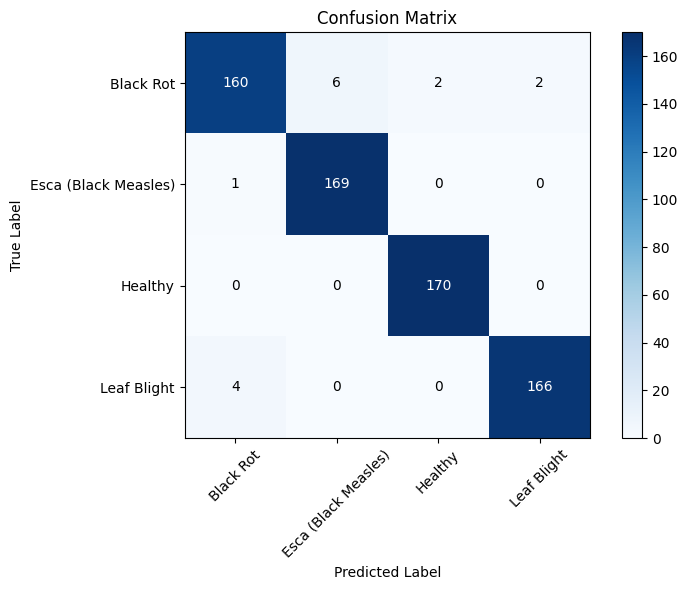

In [ ]:
# Confusion Matrix
# Model Predict
y_pred = model2.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)

# True Label
y_true = test_generator.classes

# Class Names
class_names = list(test_generator.class_indices.keys())

# Count Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Create confusion matrix plot
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Display a label in each cell of the confusion matrix
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

In [ ]:
# Classification Report
cr = classification_report(y_true, y_pred, target_names=test_generator.class_indices)

# Showing Classification Report
print('Classification Report:')
print(cr)

Classification Report:
                      precision    recall  f1-score   support

           Black Rot       0.97      0.94      0.96       170
Esca (Black Measles)       0.97      0.99      0.98       170
             Healthy       0.99      1.00      0.99       170
         Leaf Blight       0.99      0.98      0.98       170

            accuracy                           0.98       680
           macro avg       0.98      0.98      0.98       680
        weighted avg       0.98      0.98      0.98       680



####Testing Prediction Model 2

Saving LeafBlightgrape.jpg to LeafBlightgrape.jpg


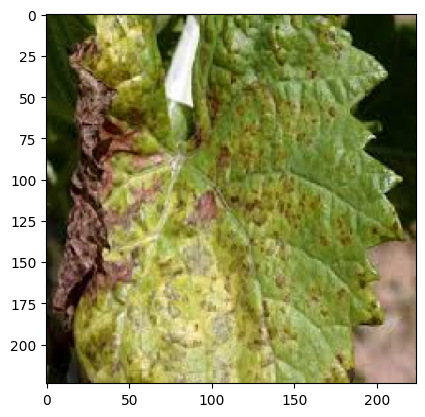

1/1 [==============================] - 0s 20ms/step

Predict:
Leaf Blight

Probability:
Black Rot : 0.01%
Esca (Black Measles) : 0.00%
Healthy : 0.00%
Leaf Blight : 99.99%


In [ ]:
# Definisikan label kelas
labels = ['Black Rot', 'Esca (Black Measles)', 'Healthy', 'Leaf Blight']

# Upload gambar
uploaded = files.upload()

# Proses setiap gambar yang di-upload
for path in uploaded.keys():
    # Load dan preprocess gambar
    img = image.load_img(path, target_size=(224, 224))
    imgplot = plt.imshow(img)
    plt.show()

    # Convert image ke array
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x /= 255  # Normalisasi

    # Prediksi kelas gambar
    classes = model2.predict(x, batch_size=32)
    predicted_class_indices = np.argmax(classes)

    # Menampilkan hasil prediksi
    print("\nPredict:")
    print(labels[predicted_class_indices])

    # Menampilkan probabilitas setiap kelas
    print("\nProbability:")
    for idx, val in enumerate(labels):
        print(f"{val} : {classes[0][idx] * 100:.2f}%")

####Saving Model 2

In [ ]:
model2.save("grape_model_2.h5")
tf.keras.models.save_model(model2, 'grape_model_2.hdf5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
<ipython-input-45-c9b0579e22b1>:2: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(model2, 'grape_model_2.hdf5')


In [ ]:
import subprocess

# Path model .h5
h5_model_path = 'grape_model_2.h5'

# Path output untuk model TensorFlow.js
tfjs_output_path = 'tfjs_model2/'

# Perintah konversi menggunakan tensorflowjs_converter
command = [
    'tensorflowjs_converter',
    '--input_format=keras',
    h5_model_path,
    tfjs_output_path
]

# Eksekusi konversi
try:
    subprocess.run(command, check=True)
    print(f"Model berhasil dikonversi ke TensorFlow.js di: {tfjs_output_path}")
except subprocess.CalledProcessError as e:
    print(f"Error saat mengonversi model: {e}")


Model berhasil dikonversi ke TensorFlow.js di: tfjs_model2/


In [ ]:
import shutil

# Path folder hasil konversi
tfjs_output_path = 'tfjs_model2'

# Nama file ZIP output
zip_file_name = 'tfjs_model2.zip'

# Membuat file ZIP dari folder
shutil.make_archive(zip_file_name.replace('.zip', ''), 'zip', tfjs_output_path)

print(f"Folder '{tfjs_output_path}' berhasil dikompresi menjadi '{zip_file_name}'")

Folder 'tfjs_model2' berhasil dikompresi menjadi 'tfjs_model2.zip'


###Build Model 3

####Model Architecture 3

In [ ]:
img_shape = (224, 224, 3)

model3 = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=img_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(512, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dense(num_labels, activation='softmax')
])

model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 28, 28, 128)       0

####Training and Evaluation Model 3

In [ ]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=4, restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint('best_model3.keras', save_best_only=True)
]

model3.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

history3 = model3.fit(
    train_generator,
    epochs=50,
    steps_per_epoch=len(train_generator),
    validation_data=val_generator,
    validation_steps=len(val_generator),
    callbacks=callbacks
)

Epoch 1/50
55/55 [==============================] - 130s 2s/step - loss: 1.2404 - accuracy: 0.3815 - val_loss: 0.8443 - val_accuracy: 0.6716
Epoch 2/50
55/55 [==============================] - 115s 2s/step - loss: 0.7367 - accuracy: 0.6975 - val_loss: 0.5251 - val_accuracy: 0.7633
Epoch 3/50
55/55 [==============================] - 102s 2s/step - loss: 0.5177 - accuracy: 0.7962 - val_loss: 0.3944 - val_accuracy: 0.8550
Epoch 4/50
55/55 [==============================] - 101s 2s/step - loss: 0.4835 - accuracy: 0.8188 - val_loss: 0.3681 - val_accuracy: 0.8580
Epoch 5/50
55/55 [==============================] - 103s 2s/step - loss: 0.2881 - accuracy: 0.8922 - val_loss: 0.2859 - val_accuracy: 0.8979
Epoch 6/50
55/55 [==============================] - 100s 2s/step - loss: 0.3021 - accuracy: 0.8854 - val_loss: 0.2236 - val_accuracy: 0.9083
Epoch 7/50
55/55 [==============================] - 103s 2s/step - loss: 0.2052 - accuracy: 0.9264 - val_loss: 0.1018 - val_accuracy: 0.9660
Epoch 8/50
55

In [ ]:
test_loss, test_accuracy = model3.evaluate(val_generator, steps=len(val_generator))
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

7/7 [==============================] - 27s 4s/step - loss: 0.0241 - accuracy: 0.9926
Test Loss: 0.02407589554786682
Test Accuracy: 0.9926035404205322


In [ ]:
# Image Data Generator
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Test Generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (224, 224),
    batch_size = 100,
    class_mode = 'categorical',
    shuffle = False
)

# Evaluate the Model on Test Set
loss, accuracy = model3.evaluate(test_generator, steps=len(test_generator))
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Found 680 images belonging to 4 classes.
7/7 [==============================] - 7s 973ms/step - loss: 0.0777 - accuracy: 0.9794
Test Loss: 0.07771185785531998
Test Accuracy: 0.979411780834198


####Visualization of Accuracy and Loss & Confusion Matrix Model 3

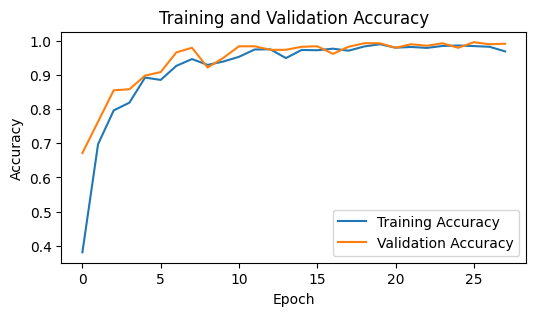

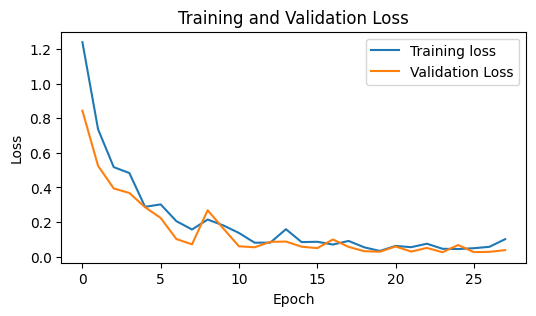

In [ ]:
# Accuracy Plot
plt.figure(figsize=(6, 3))
plt.plot(history3.history['accuracy'], label='Training Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss Plot
plt.figure(figsize=(6, 3))
plt.plot(history3.history['loss'], label='Training loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

7/7 [==============================] - 3s 449ms/step


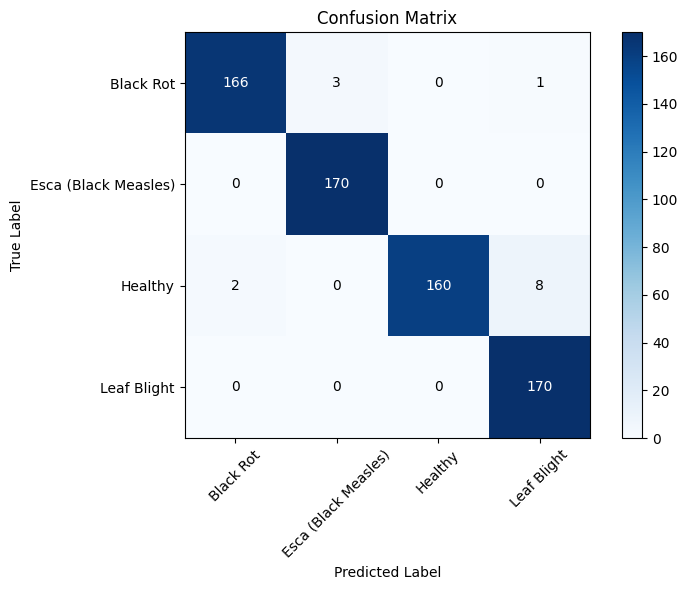

In [ ]:
# Confusion Matrix
# Model Predict
y_pred = model3.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)

# True Label
y_true = test_generator.classes

# Class Names
class_names = list(test_generator.class_indices.keys())

# Count Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Create confusion matrix plot
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Display a label in each cell of the confusion matrix
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

In [ ]:
# Classification Report
cr = classification_report(y_true, y_pred, target_names=test_generator.class_indices)

# Showing Classification Report
print('Classification Report:')
print(cr)

Classification Report:
                      precision    recall  f1-score   support

           Black Rot       0.99      0.98      0.98       170
Esca (Black Measles)       0.98      1.00      0.99       170
             Healthy       1.00      0.94      0.97       170
         Leaf Blight       0.95      1.00      0.97       170

            accuracy                           0.98       680
           macro avg       0.98      0.98      0.98       680
        weighted avg       0.98      0.98      0.98       680



####Testing Prediction Model 3

Saving blackRotGrape.jpg to blackRotGrape.jpg


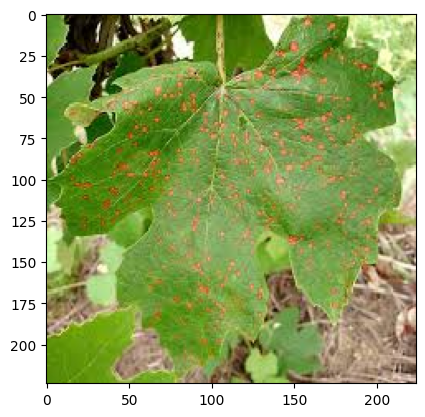

1/1 [==============================] - 1s 554ms/step

Predict:
Black Rot

Probability:
Black Rot : 99.79%
Esca (Black Measles) : 0.19%
Healthy : 0.00%
Leaf Blight : 0.02%


In [ ]:
# Definisikan label kelas
labels = ['Black Rot', 'Esca (Black Measles)', 'Healthy', 'Leaf Blight']

# Upload gambar
uploaded = files.upload()

# Proses setiap gambar yang di-upload
for path in uploaded.keys():
    # Load dan preprocess gambar
    img = image.load_img(path, target_size=(224, 224))
    imgplot = plt.imshow(img)
    plt.show()

    # Convert image ke array
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x /= 255  # Normalisasi

    # Prediksi kelas gambar
    classes = model3.predict(x, batch_size=32)
    predicted_class_indices = np.argmax(classes)

    # Menampilkan hasil prediksi
    print("\nPredict:")
    print(labels[predicted_class_indices])

    # Menampilkan probabilitas setiap kelas
    print("\nProbability:")
    for idx, val in enumerate(labels):
        print(f"{val} : {classes[0][idx] * 100:.2f}%")

####Saving Model 3

In [ ]:
model3.save("grape_model_3.h5")
tf.keras.models.save_model(model3, 'grape_model_3.hdf5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
<ipython-input-26-97e0986239a5>:2: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(model3, 'grape_model_3.hdf5')


In [ ]:
import subprocess

# Path model .h5
h5_model_path = 'grape_model_3.h5'

# Path output untuk model TensorFlow.js
tfjs_output_path = 'tfjs_model3/'

# Perintah konversi menggunakan tensorflowjs_converter
command = [
    'tensorflowjs_converter',
    '--input_format=keras',
    h5_model_path,
    tfjs_output_path
]

# Eksekusi konversi
try:
    subprocess.run(command, check=True)
    print(f"Model berhasil dikonversi ke TensorFlow.js di: {tfjs_output_path}")
except subprocess.CalledProcessError as e:
    print(f"Error saat mengonversi model: {e}")


Model berhasil dikonversi ke TensorFlow.js di: tfjs_model3/


In [ ]:
import shutil

# Path folder hasil konversi
tfjs_output_path = 'tfjs_model3'

# Nama file ZIP output
zip_file_name = 'tfjs_model3.zip'

# Membuat file ZIP dari folder
shutil.make_archive(zip_file_name.replace('.zip', ''), 'zip', tfjs_output_path)

print(f"Folder '{tfjs_output_path}' berhasil dikompresi menjadi '{zip_file_name}'")


Folder 'tfjs_model3' berhasil dikompresi menjadi 'tfjs_model3.zip'


#Download Model 1 2 3

In [ ]:
from google.colab import files

files.download('tfjs_model1.zip')

In [ ]:
from google.colab import files

files.download('tfjs_model2.zip')

In [ ]:
from google.colab import files

files.download('tfjs_model3.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>